In [2]:
import pandas as pd
import numpy as np

players_info = pd.read_csv("C:\\Users\\HP\\Downloads\\archive\players_info.csv")
batting_card = pd.read_csv("C:\\Users\\HP\\Downloads\\archive\\t20i_Batting_Card.csv")
bowling_card= pd.read_csv("C:\\Users\\HP\\Downloads\\archive\\t20i_Bowling_Card.csv")
fow_card= pd.read_csv("C:\\Users\\HP\\Downloads\\archive\\t20i_Fow_Card.csv")
matches_stats= pd.read_csv("C:\\Users\\HP\\Downloads\\archive\\t20i_Matches_Data.csv")
partnership_stats = pd.read_csv("C:\\Users\\HP\\Downloads\\archive\\t20i_Partnership_Card.csv")
players_info.head(3)


players_info.drop(["player_object_id","dob","dod","gender","image_url","image_metadata"],axis=1,inplace=True)
#players_info.info()
players_info.isnull().sum()
players_info['batting_style'] = players_info['batting_style'].fillna(np.nan) 
players_info['bowling_style'] = players_info['bowling_style'].fillna(np.nan)
players_info[players_info['country_id'].isnull()]
country_to_player = {}
for _,row in matches_stats.iterrows():
    team1_country = row['Team1 ID']
    team2_country = row['Team2 ID']
    team1_xi = eval(row['Team1 Playing 11'])
    team2_xi = eval(row['Team2 Playing 11'])
    for player in team1_xi : 
        country_to_player[str(player)] = team1_country
    for player in team2_xi:
        country_to_player[str(player)] = team2_country
mask = players_info['country_id'].isna()
players_info.loc[mask, 'country_id'] = players_info.loc[mask, 'player_id'].astype(str).map(country_to_player)
players_info = players_info.convert_dtypes()


players_info.columns = [col.title() for col in players_info.columns]
players_info.info()

players_info.to_csv("D:\Projects\Stats Project\\players_info.csv")
players_info.head(3)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6701 entries, 0 to 6700
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Player_Id      6701 non-null   Int64 
 1   Player_Name    6701 non-null   string
 2   Batting_Style  6608 non-null   string
 3   Bowling_Style  5547 non-null   string
 4   Country_Id     6701 non-null   Int64 
dtypes: Int64(2), string(3)
memory usage: 275.0 KB


,Player_Id,Player_Name,Batting_Style,Bowling_Style,Country_Id
0,93957,Avinash Pai,right-hand bat,right-arm offbreak,18
1,2182,Sherwin Campbell,right-hand bat,right-arm medium,4
2,48391,Tamim Iqbal,left-hand bat,<NA>,25


([<matplotlib.axis.YTick at 0x125a9963a10>,
 [Text(0, 0, '0'),
  Text(0, 1, '1'),
  Text(0, 2, '2'),
  Text(0, 3, '3'),
  Text(0, 4, '4'),
  Text(0, 5, '5'),
  Text(0, 6, '6'),
  Text(0, 7, '7'),
  Text(0, 8, '8')])

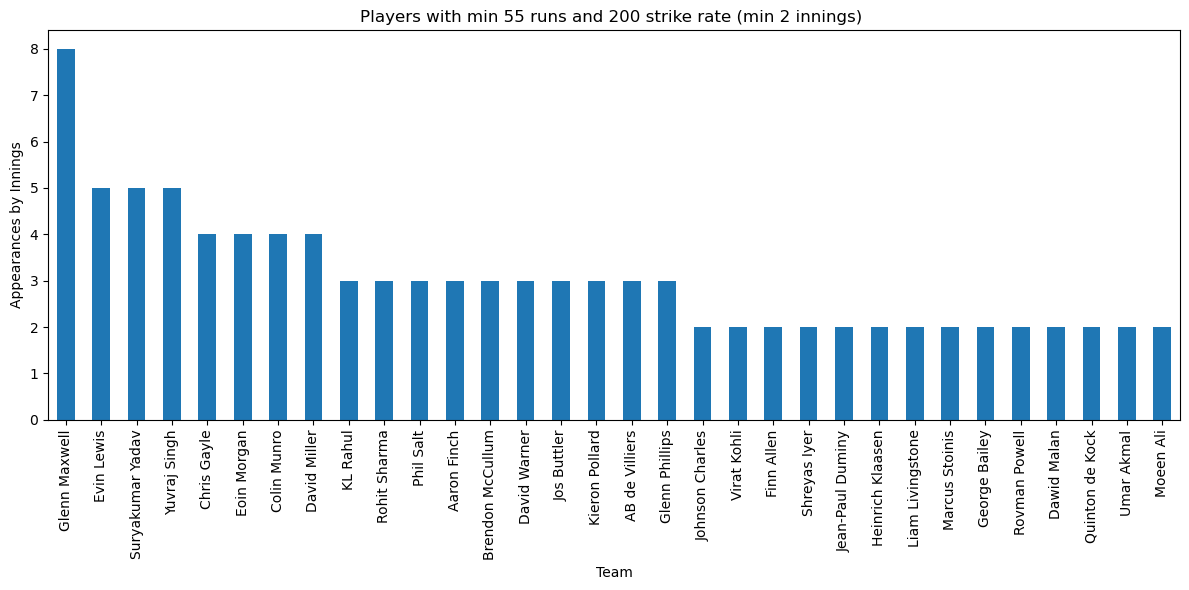

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

batting_card = pd.read_csv("C:\\Users\\HP\\Downloads\\archive\\t20i_Batting_Card.csv")
batting_card = batting_card[batting_card['team'].notna()]
batting_card['team'].isnull().sum()

batting_card.columns = batting_card.columns.str.strip()

batting_card[batting_card['runs'].isnull()]
batting_card = batting_card[batting_card['runs'].notna()]
batting_card.isnull().sum()
batting_card = batting_card.convert_dtypes()

batting_card.to_csv("D:\Projects\Stats Project\\batting_card.csv")

batting_card.head(4)

top_teams = ['India', 'Pakistan', 'Australia', 'England', 'New Zealand', 
             'South Africa', 'Sri Lanka', 'West Indies', 'Bangladesh','Afghanistan']

top_data = batting_card[batting_card['team'].isin(top_teams)]


players_info = pd.read_csv("D:\Projects\Stats Project\\players_info.csv", index_col=0)
merged_data = top_data.merge(players_info, left_on="batsman", right_on="Player_Id", how="left")
new_merged_data = merged_data.merge(matches_stats,left_on="Match ID", right_on= "Match ID", how= "left")
new_merged_data['opposition'] = np.where(
    new_merged_data['team'] != new_merged_data['Team1 Name'],
    new_merged_data['Team1 Name'],
    new_merged_data['Team2 Name']
)
new_merged_data = new_merged_data[new_merged_data['opposition'].isin(top_teams)]
filtered_data = new_merged_data[new_merged_data['strikeRate'] >= 200]
filtered_data= filtered_data[["team","Player_Name","runs","balls","strikeRate","opposition"]]
top_50 = filtered_data.sort_values(by="runs",ascending=False).head(150)
top_50
top_50_team = top_50['team'].value_counts()
top_50_players = top_50['Player_Name'].value_counts().head(32)

plt.figure(figsize=(12,6))
top_50_players.plot(kind="bar")
plt.title("Players with min 55 runs and 200 strike rate (min 2 innings) ")
plt.xlabel("Team")
plt.ylabel("Appearances by Innings")
plt.tight_layout()
y_max = top_50_players.max()
plt.yticks(np.arange(0,y_max +1, 1))
#plt.show()


In [4]:
import pandas as pd
import numpy as np 
import plotly.express as px
bowling_card = pd.read_csv("C:\\Users\\HP\\Downloads\\archive\\t20i_Bowling_Card.csv")
bowling_card.head(3)
bowling_card.isnull().sum()
bowling_card[bowling_card['team'].isnull()]
bowling_card = bowling_card[bowling_card['team'].notna()]
bowling_card[bowling_card['dots'].isnull()]
bowling_card.isnull().sum()
bowling_card['team']=bowling_card['team'].astype('string')
bowling_card['opposition']=bowling_card['opposition'].astype('string')
bowling_card[['bowler id','balls','maidens','conceded','wickets','dots','fours','sixes','wides','noballs']] =bowling_card[['bowler id','balls','maidens','conceded','wickets','dots','fours','sixes','wides','noballs']].astype('Int64')
bowling_card.info()
bowling_card.to_csv("D:\Projects\Stats Project\\bowling_card.csv")

new_bowling_card = bowling_card[bowling_card['team'].isin(top_teams)]
new_bowling_card = new_bowling_card[new_bowling_card['opposition'].isin(top_teams)]

players_info.columns = players_info.columns.str.strip()
new_bowling_card.columns = new_bowling_card.columns.str.strip()

new_bowling_data = new_bowling_card.merge(players_info, left_on="bowler id", right_on="Player_Id", how="left")
new_bowling_data = new_bowling_data[['Player_Name','Player_Id','team','opposition','overs','economy','balls','maidens','conceded','wickets','dots','fours','sixes','wides','noballs']]
new_bowling_data.head(5)

aggregated_bowling = new_bowling_data.groupby(['Player_Name','Player_Id']).agg({
    'overs': 'sum',
    'balls': 'sum',
    'maidens': 'sum',
    'conceded': 'sum',
    'wickets': 'sum',
    'dots': 'sum',
    'fours': 'sum',
    'sixes': 'sum',
    'wides': 'sum',
    'noballs': 'sum',
    'economy': 'mean'
}).reset_index()
aggregated_bowling= aggregated_bowling.drop(columns=["Player_Id"])
aggregated_bowling['Strike_Rate'] = aggregated_bowling.apply(
    lambda row: round(row['balls'] / row['wickets'],2) if row['wickets'] > 0 else None, axis =1
)
aggregated_bowling['economy'] = aggregated_bowling['economy'].round(2)
aggregated_bowling = aggregated_bowling[aggregated_bowling['overs'] > 40 ]
aggregated_bowling = aggregated_bowling[aggregated_bowling['wickets'] > 20]

bowling_wicket = aggregated_bowling.sort_values(by="wickets",ascending=False)
bowling_economy= aggregated_bowling.sort_values(by="economy",ascending=True)

bowling_wicket.head(10)
bowling_economy.head(10)



fig = px.scatter(
    aggregated_bowling,
    x="economy",
    y="wickets",
    size="Strike_Rate",
    hover_name="Player_Name",
    title= "Bowlers with economy rates minimum 40 overs bowled and 20 wickets taken",
    labels={"Player_Id": "Bowler", "Economy": "Economy Rate"},
    width=1000,
    height=600
)
#fig.show()


<class 'pandas.core.frame.DataFrame'>
Index: 30622 entries, 0 to 30647
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Match ID    30622 non-null  int64  
 1   innings     30622 non-null  int64  
 2   team        30622 non-null  string 
 3   opposition  30622 non-null  string 
 4   bowler id   30622 non-null  Int64  
 5   overs       30622 non-null  float64
 6   balls       30622 non-null  Int64  
 7   maidens     30622 non-null  Int64  
 8   conceded    30622 non-null  Int64  
 9   wickets     30622 non-null  Int64  
 10  economy     30622 non-null  float64
 11  dots        28275 non-null  Int64  
 12  fours       28275 non-null  Int64  
 13  sixes       28275 non-null  Int64  
 14  wides       30622 non-null  Int64  
 15  noballs     30622 non-null  Int64  
dtypes: Int64(10), float64(2), int64(2), string(2)
memory usage: 4.3 MB


In [5]:
import pandas as pd
import numpy as np 
fow_card= pd.read_csv("C:\\Users\\HP\\Downloads\\archive\\t20i_Fow_Card.csv")
fow_card= fow_card.dropna()
fow_card.isnull().sum()
fow_card[['player','wicket','runs']]= fow_card[['player','wicket','runs']].astype("Int64")
fow_card['team']= fow_card['team'].astype('string')
fow_card.info()

fow_card.to_csv("D:\Projects\Stats Project\\fow_card.csv")

<class 'pandas.core.frame.DataFrame'>
Index: 32558 entries, 0 to 33092
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Match ID  32558 non-null  int64  
 1   innings   32558 non-null  int64  
 2   team      32558 non-null  string 
 3   player    32558 non-null  Int64  
 4   wicket    32558 non-null  Int64  
 5   over      32558 non-null  float64
 6   runs      32558 non-null  Int64  
dtypes: Int64(3), float64(1), int64(2), string(1)
memory usage: 2.1 MB


In [6]:
import pandas as pd
import numpy as np 
matches_stats= pd.read_csv("C:\\Users\\HP\\Downloads\\archive\\t20i_Matches_Data.csv")
matches_stats.head(3)

matches_stats= matches_stats[matches_stats['Toss Winner'].notna()]


matches_stats = matches_stats[
    ~(matches_stats['Team1 Runs Scored'].isnull() & matches_stats['Match Winner'].notna())
]

matches_stats = matches_stats.convert_dtypes()
matches_stats['Match Date'] = pd.to_datetime(matches_stats['Match Date'], errors='coerce')
matches_stats['MOM Player']= matches_stats['MOM Player'].astype("string")
matches_stats.info()

matches_stats.to_csv("D:\Projects\Stats Project\\matches_data.csv")


<class 'pandas.core.frame.DataFrame'>
Index: 2590 entries, 0 to 2591
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   T20I Match No          2590 non-null   Int64         
 1   Match ID               2590 non-null   Int64         
 2   Match Name             2590 non-null   string        
 3   Series ID              2590 non-null   Int64         
 4   Series Name            2590 non-null   string        
 5   Match Date             2579 non-null   datetime64[ns]
 6   Match Format           2590 non-null   string        
 7   Team1 ID               2590 non-null   Int64         
 8   Team1 Name             2590 non-null   string        
 9   Team1 Captain          2590 non-null   Int64         
 10  Team1 Runs Scored      2578 non-null   Int64         
 11  Team1 Wickets Fell     2578 non-null   Int64         
 12  Team1 Extras Rec       2578 non-null   Int64         
 13  Team2 ID

<class 'pandas.core.frame.DataFrame'>
Index: 36773 entries, 0 to 36798
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Match ID           36773 non-null  Int64 
 1   innings            36773 non-null  Int64 
 2   for wicket         36773 non-null  Int64 
 3   team               36773 non-null  string
 4   opposition         36773 non-null  string
 5   player1            36773 non-null  Int64 
 6   player2            36773 non-null  Int64 
 7   player1 runs       36773 non-null  Int64 
 8   player2 runs       36773 non-null  Int64 
 9   player1 balls      36773 non-null  Int64 
 10  player2 balls      36773 non-null  Int64 
 11  partnership runs   36773 non-null  Int64 
 12  partnership balls  36773 non-null  Int64 
dtypes: Int64(11), string(2)
memory usage: 4.3 MB


C:\Users\HP\AppData\Local\Temp\ipykernel_19988\4001024782.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




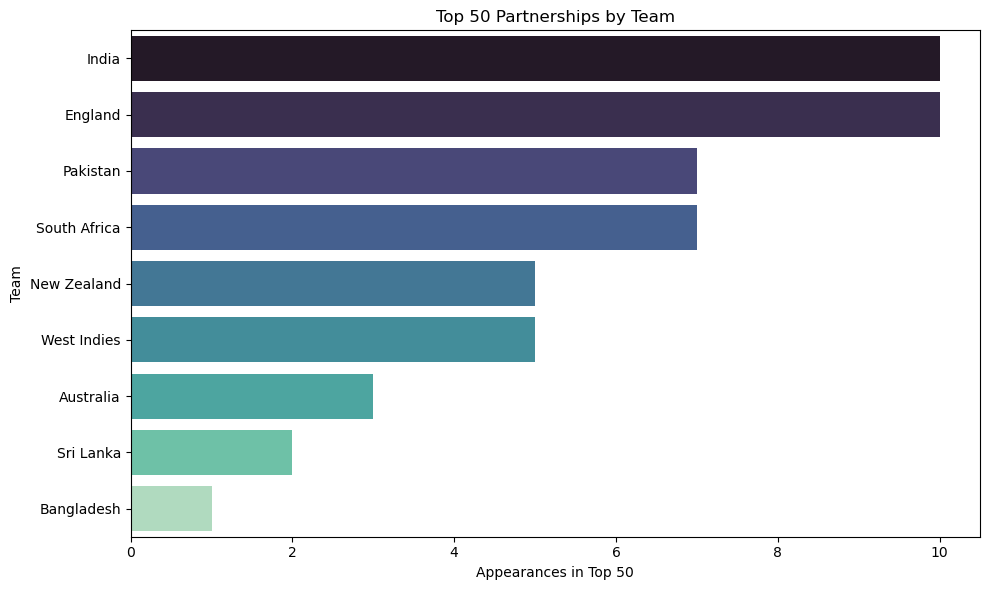

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 



partnership_stats = pd.read_csv("C:\\Users\\HP\\Downloads\\archive\\t20i_Partnership_Card.csv")
partnership_stats.head(4)

partnership_stats[partnership_stats['for wicket'].isnull()]
partnership_stats.dropna(inplace=True)
partnership_stats.isnull().sum()



partnership_stats= partnership_stats.convert_dtypes()
partnership_stats.info()


partnership_stats.to_csv("D:\Projects\Stats Project\\partnership_data.csv")
partnership_stats.head(4)


top_teams = ['India', 'Pakistan', 'Australia', 'England', 'New Zealand', 
             'South Africa', 'Sri Lanka', 'West Indies', 'Bangladesh','Afghanistan']

top_teams_data = partnership_stats[partnership_stats['team'].isin(top_teams) & partnership_stats['opposition'].isin(top_teams)]

top50_runs = top_teams_data.sort_values(by="partnership runs", ascending= False).head(50)

team_counts = top50_runs['team'].value_counts().reset_index()
team_counts.columns = ['team', 'count']


plt.figure(figsize=(10,6))
sns.barplot(
    data= team_counts,
    x = 'count',
    y='team',
    palette='mako'
)
plt.title ('Top 50 Partnerships by Team')
plt.xlabel('Appearances in Top 50')
plt.ylabel('Team')
plt.tight_layout()
plt.show()




